In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 92% 137M/149M [00:01<00:00, 97.0MB/s]
100% 149M/149M [00:01<00:00, 116MB/s] 


In [3]:
from genericpath import isdir
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [4]:
tr_df = get_class_paths("/content/Training")

In [5]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_0763.jpg,glioma
1,/content/Training/glioma/Tr-gl_0108.jpg,glioma
2,/content/Training/glioma/Tr-gl_0861.jpg,glioma
3,/content/Training/glioma/Tr-glTr_0006.jpg,glioma
4,/content/Training/glioma/Tr-gl_0477.jpg,glioma
...,...,...
5707,/content/Training/notumor/Tr-no_1035.jpg,notumor
5708,/content/Training/notumor/Tr-no_1404.jpg,notumor
5709,/content/Training/notumor/Tr-no_0239.jpg,notumor
5710,/content/Training/notumor/Tr-no_0821.jpg,notumor


In [6]:
ts_df = get_class_paths("/content/Testing")

In [7]:
ts_df

,Class Path,Class
0,/content/Testing/glioma/Te-gl_0148.jpg,glioma
1,/content/Testing/glioma/Te-gl_0210.jpg,glioma
2,/content/Testing/glioma/Te-gl_0201.jpg,glioma
3,/content/Testing/glioma/Te-gl_0257.jpg,glioma
4,/content/Testing/glioma/Te-glTr_0003.jpg,glioma
...,...,...
1306,/content/Testing/notumor/Te-no_0116.jpg,notumor
1307,/content/Testing/notumor/Te-no_0179.jpg,notumor
1308,/content/Testing/notumor/Te-no_0292.jpg,notumor
1309,/content/Testing/notumor/Te-no_0281.jpg,notumor


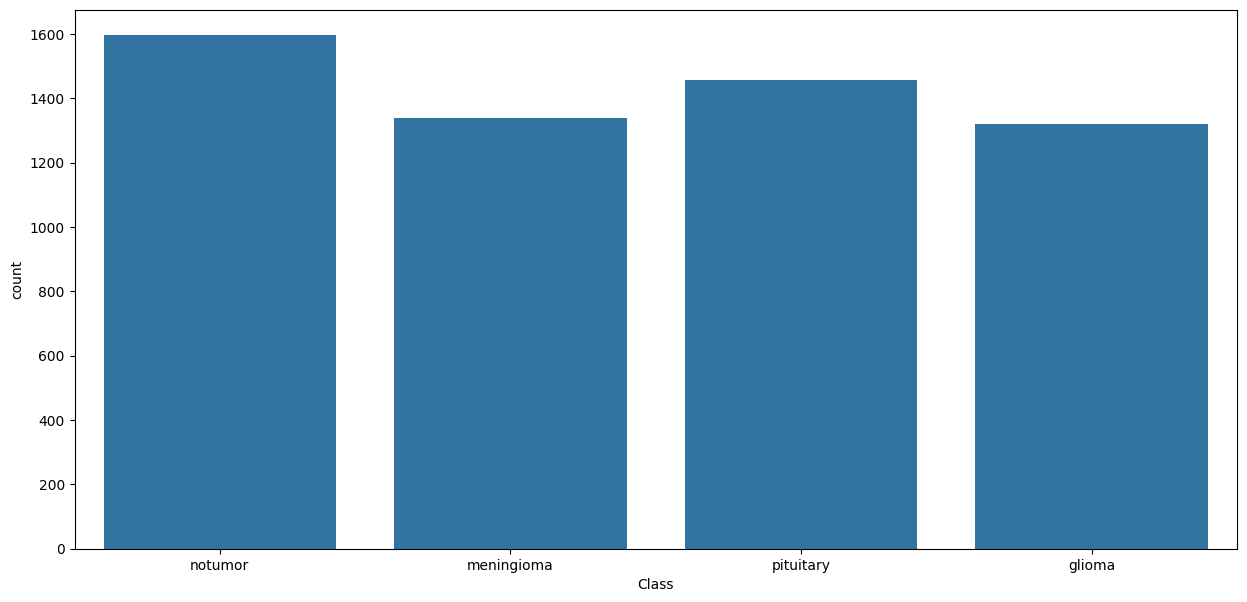

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

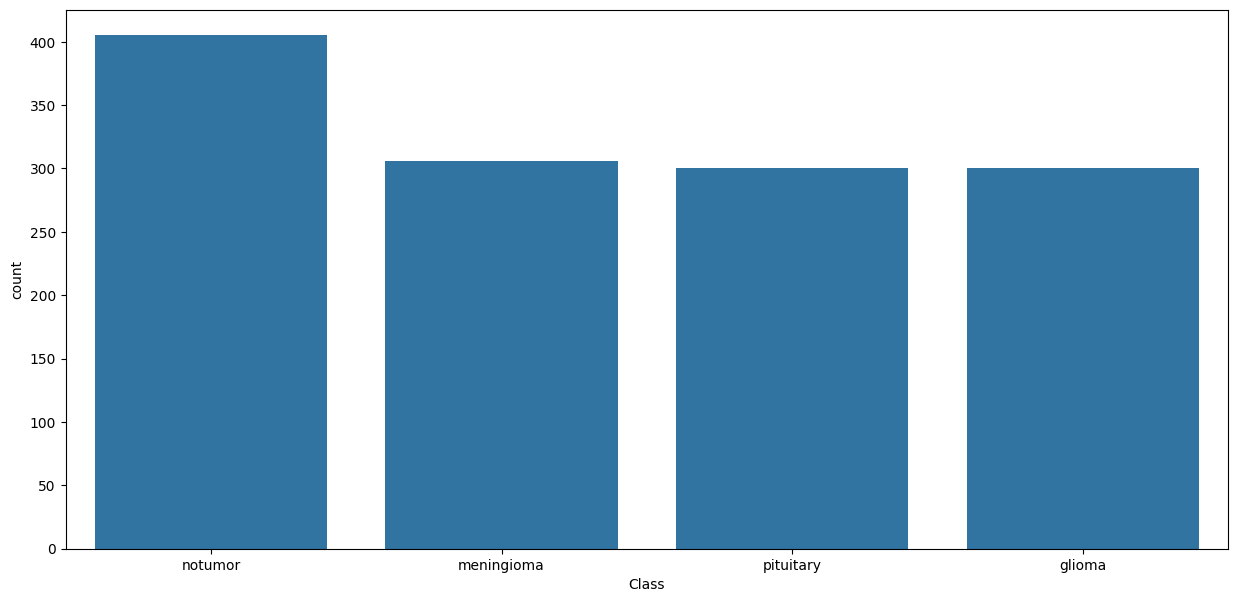

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [10]:
valid_df

,Class Path,Class
1173,/content/Testing/notumor/Te-no_0085.jpg,notumor
468,/content/Testing/pituitary/Te-pi_0199.jpg,pituitary
1163,/content/Testing/notumor/Te-no_0128.jpg,notumor
311,/content/Testing/pituitary/Te-pi_0028.jpg,pituitary
766,/content/Testing/meningioma/Te-me_0133.jpg,meningioma
...,...,...
839,/content/Testing/meningioma/Te-me_0050.jpg,meningioma
309,/content/Testing/pituitary/Te-pi_0143.jpg,pituitary
588,/content/Testing/pituitary/Te-pi_0129.jpg,pituitary
780,/content/Testing/meningioma/Te-me_0237.jpg,meningioma


In [11]:
ts_df

,Class Path,Class
531,/content/Testing/pituitary/Te-pi_0099.jpg,pituitary
837,/content/Testing/meningioma/Te-me_0116.jpg,meningioma
1142,/content/Testing/notumor/Te-no_0346.jpg,notumor
563,/content/Testing/pituitary/Te-pi_0130.jpg,pituitary
37,/content/Testing/glioma/Te-gl_0255.jpg,glioma
...,...,...
141,/content/Testing/glioma/Te-gl_0049.jpg,glioma
64,/content/Testing/glioma/Te-gl_0131.jpg,glioma
475,/content/Testing/pituitary/Te-pi_0158.jpg,pituitary
1033,/content/Testing/notumor/Te-no_0303.jpg,notumor


In [12]:
batch_size=32

img_size=(299,299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [13]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                                y_col='Class',
                                                batch_size=batch_size,
                                                target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size,
                                             shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


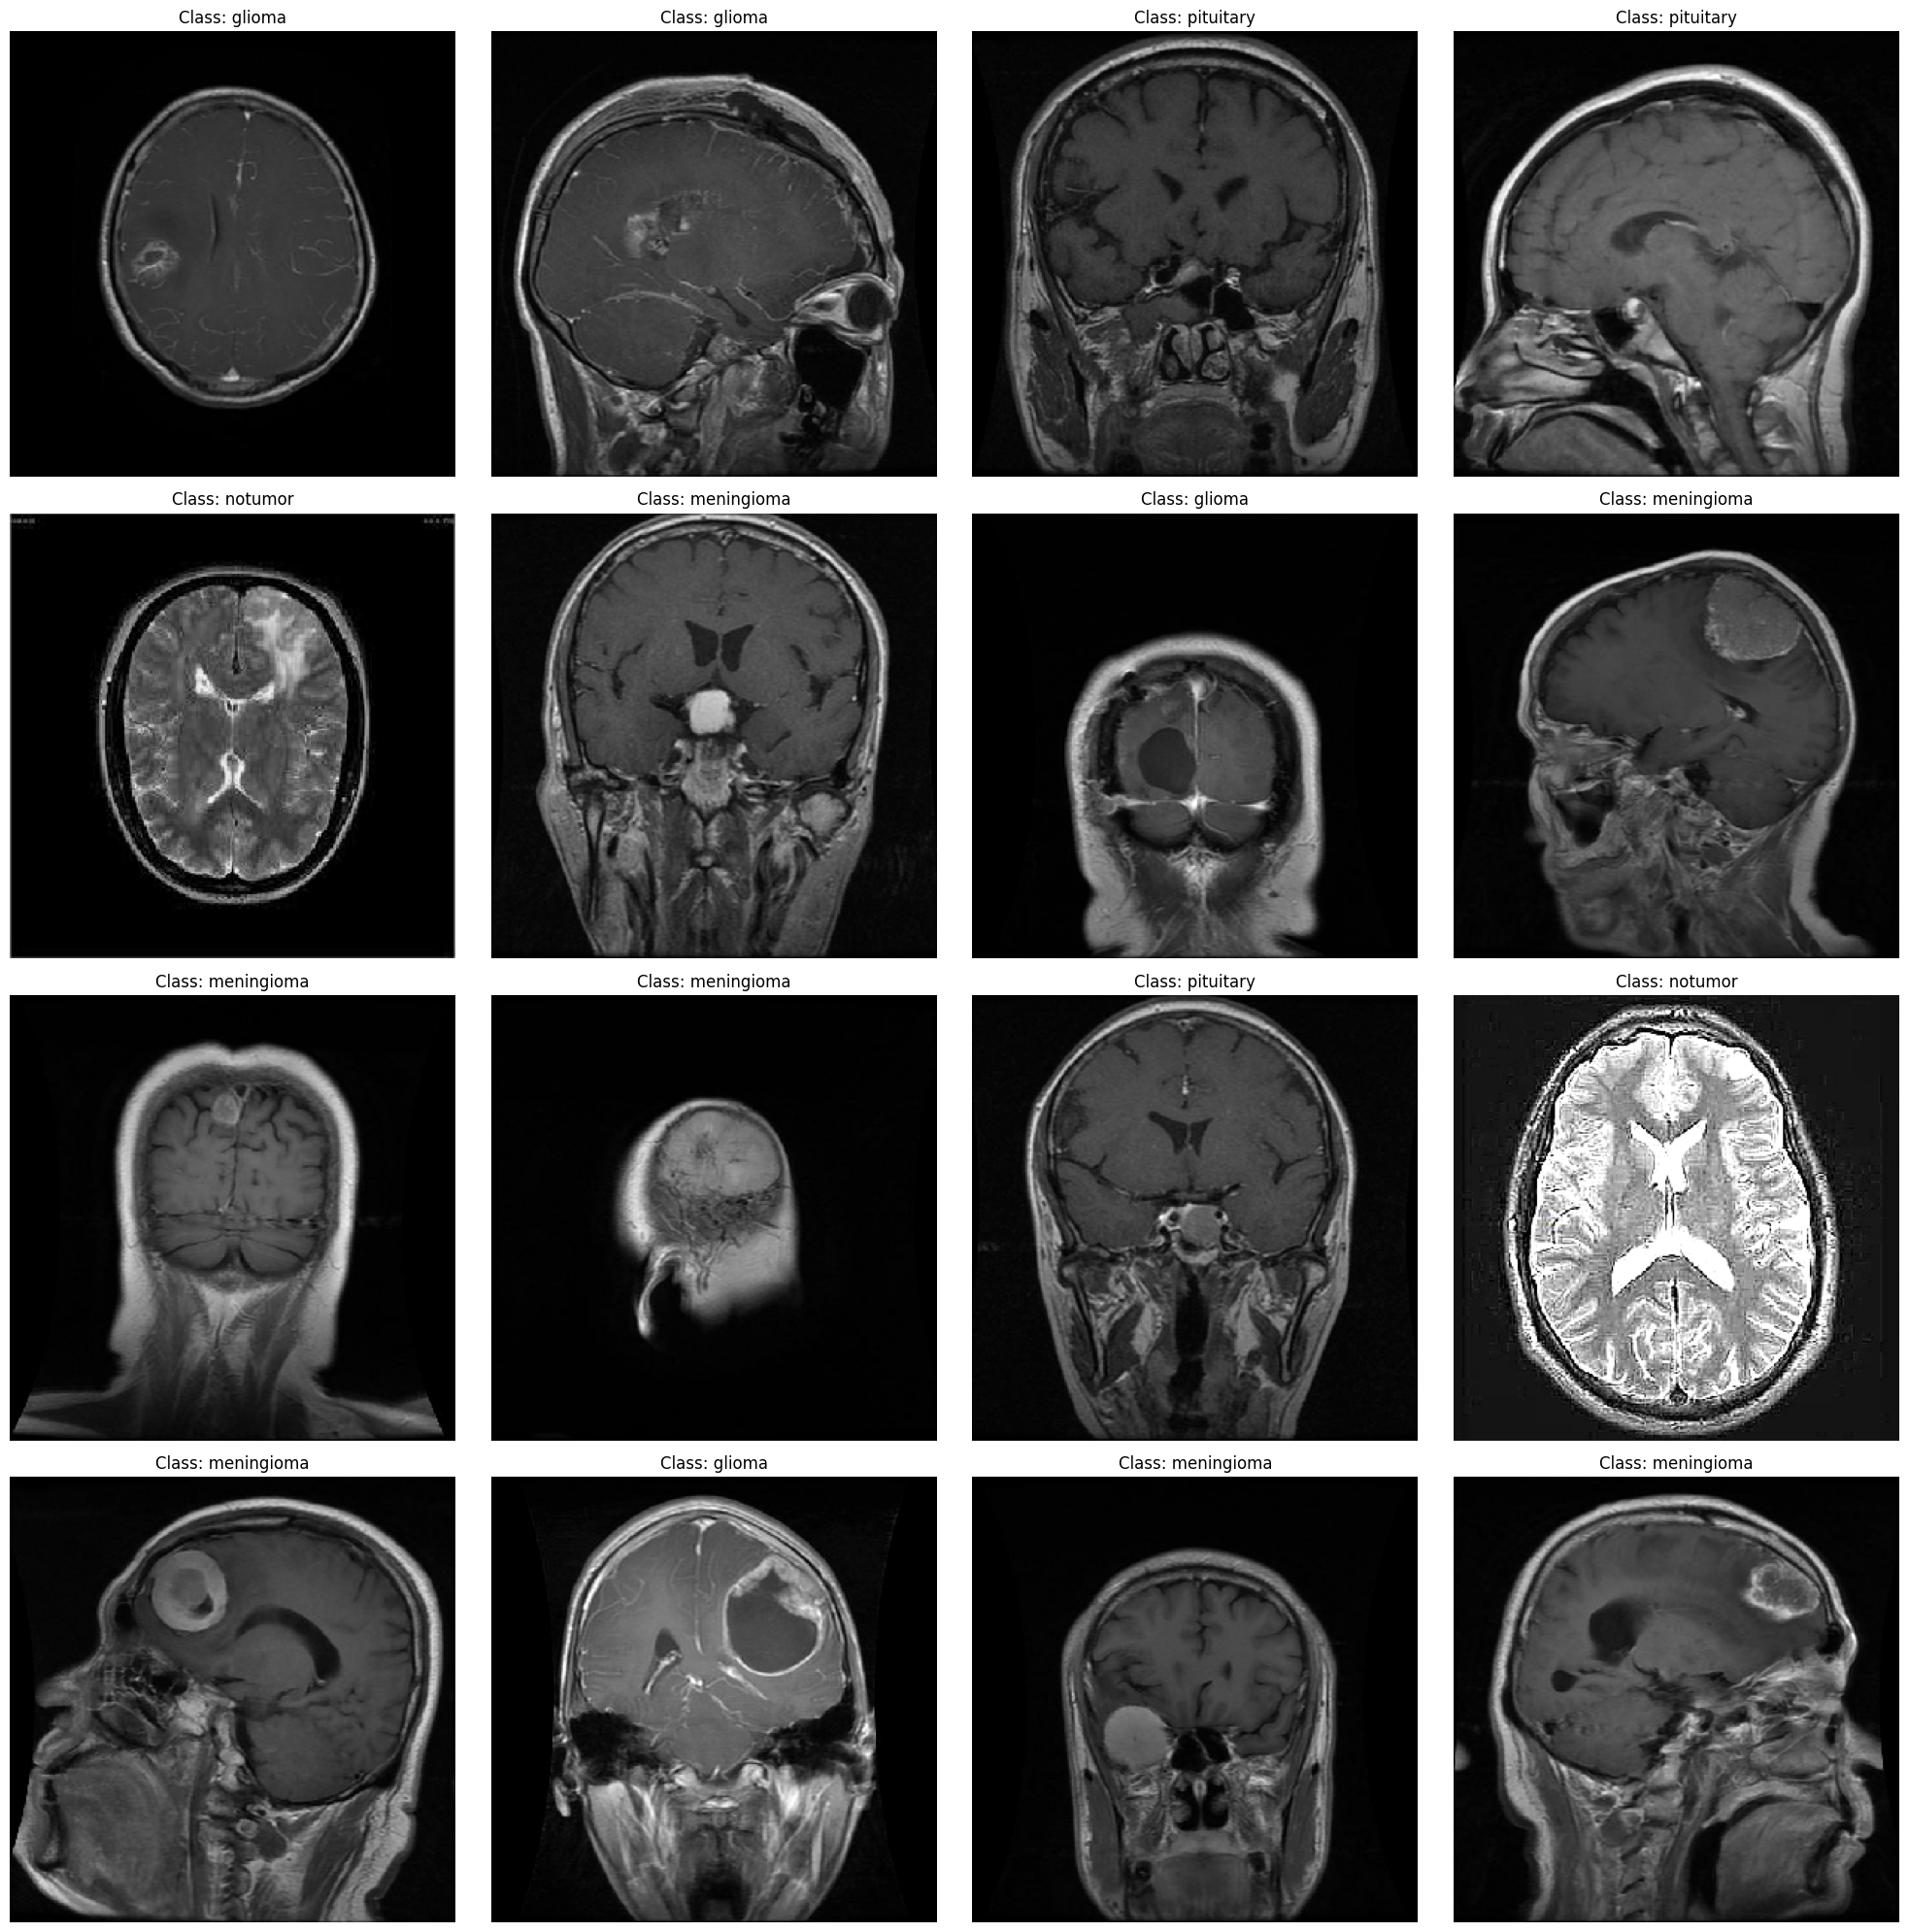

In [ ]:
plt.figure(figsize=(20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  index_position = class_indices.index(class_index)

  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
img_shape = (299,299,3)

base_model = tf.keras.applications.Xception(include_top= False,
                                            weights="imagenet",
                                            input_shape= img_shape,
                                            pooling= "max")


model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])



83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=["accuracy",
                        Precision(),
                        Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.7968 - loss: 0.6347 - precision: 0.8549 - recall: 0.6943 - val_accuracy: 0.9069 - val_loss: 0.2582 - val_precision: 0.9078 - val_recall: 0.9023
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 162s 898ms/step - accuracy: 0.9809 - loss: 0.0611 - precision: 0.9820 - recall: 0.9789 - val_accuracy: 0.9802 - val_loss: 0.0643 - val_precision: 0.9801 - val_recall: 0.9786
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 161s 896ms/step - accuracy: 0.9912 - loss: 0.0264 - precision: 0.9912 - recall: 0.9909 - val_accuracy: 0.9634 - val_loss: 0.1088 - val_precision: 0.9662 - val_recall: 0.9603
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 901ms/step - accuracy: 0.9944 - loss: 0.0192 - precision: 0.9950 - recall: 0.9942 - val_accuracy: 0.9557 - val_loss: 0.1436 - val_precision: 0.9557 - val_recall: 0.9542
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 163s 901ms/step - accuracy: 0.9943 - loss: 0.0174 - precision: 0.9943 - recall: 0.9940 - val_accuracy: 0.9939 - val_loss: 

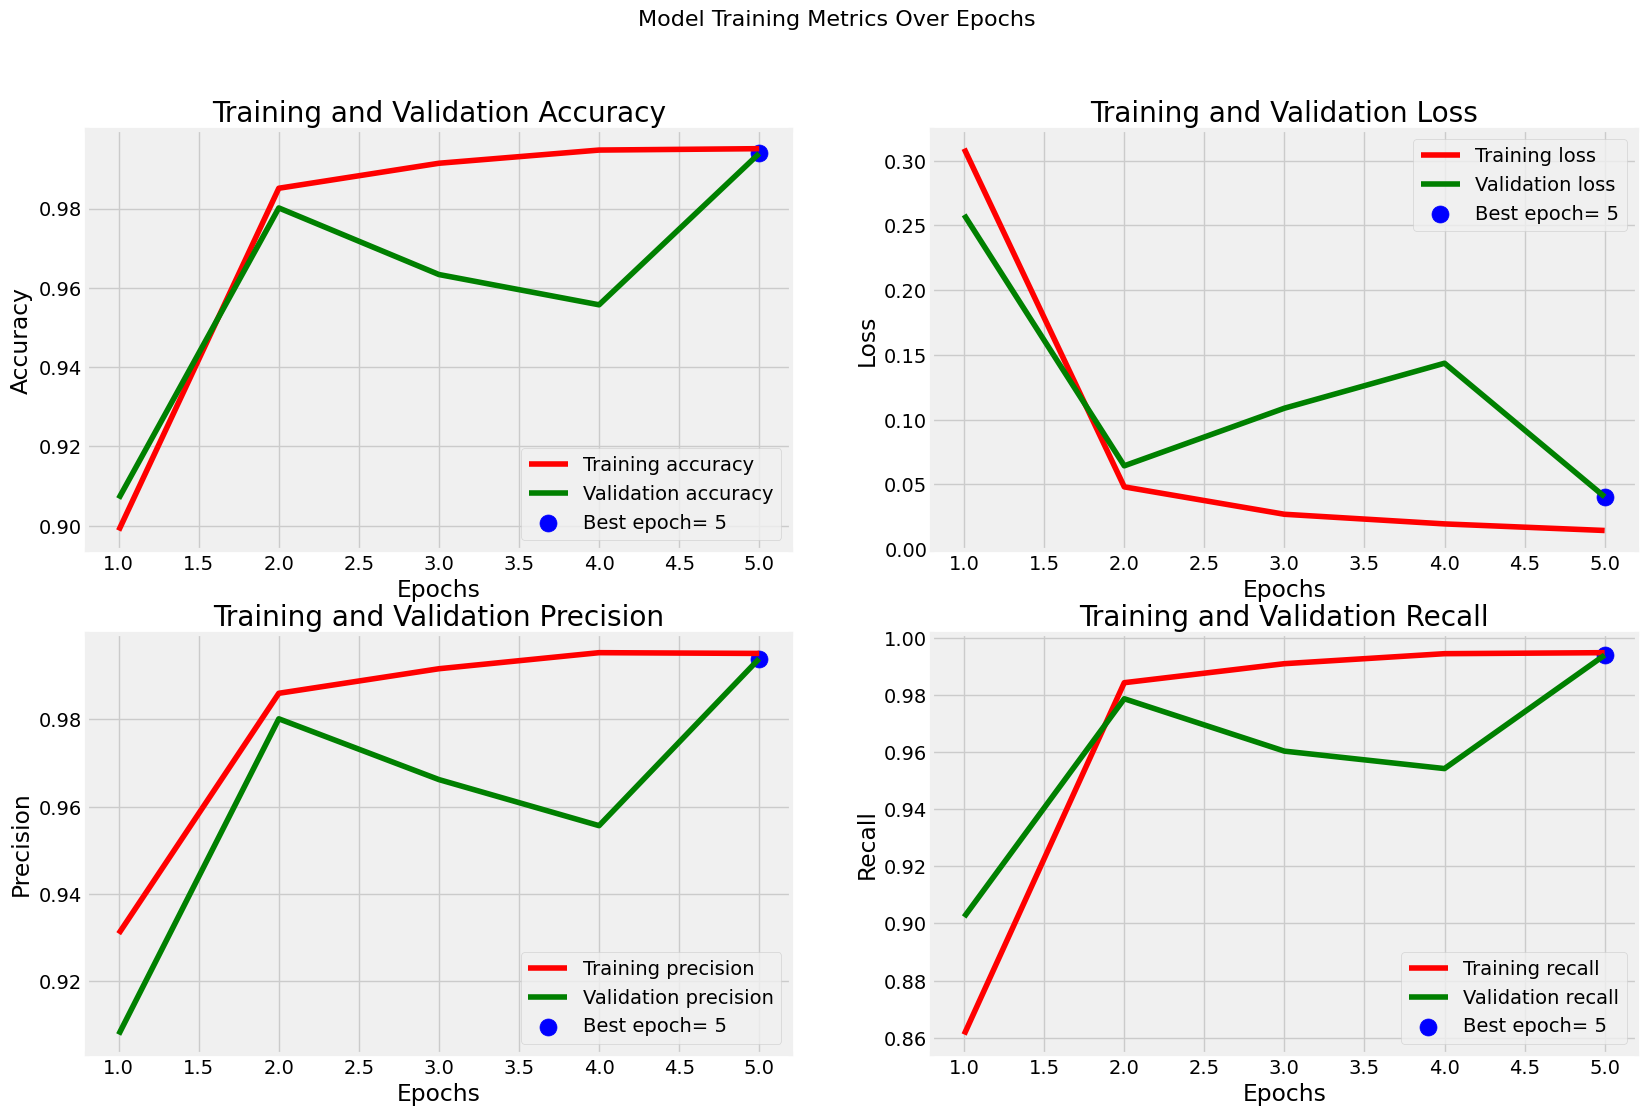

In [ ]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1,len(tr_metrics[metric])+1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch= {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Score: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f"Test Score: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 48s 269ms/step - accuracy: 0.9992 - loss: 0.0039 - precision: 0.9992 - recall: 0.9992
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.9928 - loss: 0.0649 - precision: 0.9928 - recall: 0.9928
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 1.0000 - loss: 0.0010 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9907 - loss: 0.0417 - precision: 0.9907 - recall: 0.9907
Train Score: 99.93%
Train Loss: 0.0029


Validation Accuracy: 99.24%
Validation Loss: 0.0438


Test Accuracy: 98.78%
Test Score: 0.0558


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step


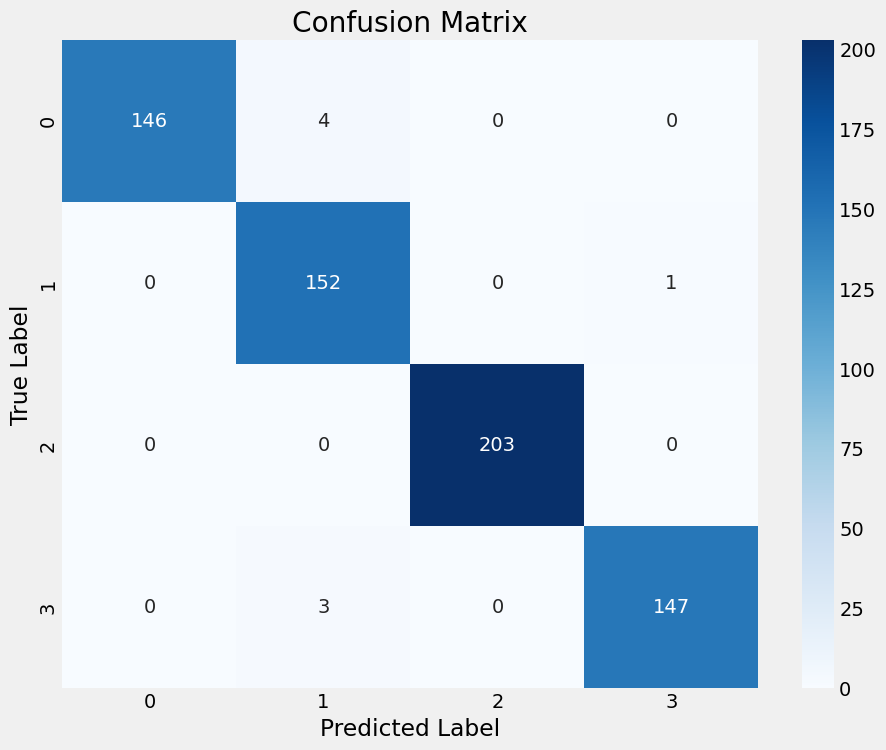

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from PIL import Image

def predict(img_path: str) -> None:
  labels = list(class_dict.keys())

  plt.figure(figsize=(6,8))


  img = Image.open(img_path)
  resized_img = img.resize((299,299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  predicted_class_idx = np.argmax(probabilities)
  predicted_class = labels[predicted_class_idx]

  plt.subplot(2,1,1)
  plt.imshow(resized_img)
  plt.title(f'Input MRI image\nPredicted: {class_dict[predicted_class]}')

  plt.subplot(2,1,2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel('Probability', fontsize=15)
  plt.title('Class Probabilities')

  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()
  print(f"\nPredicted tumor type: {class_dict[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


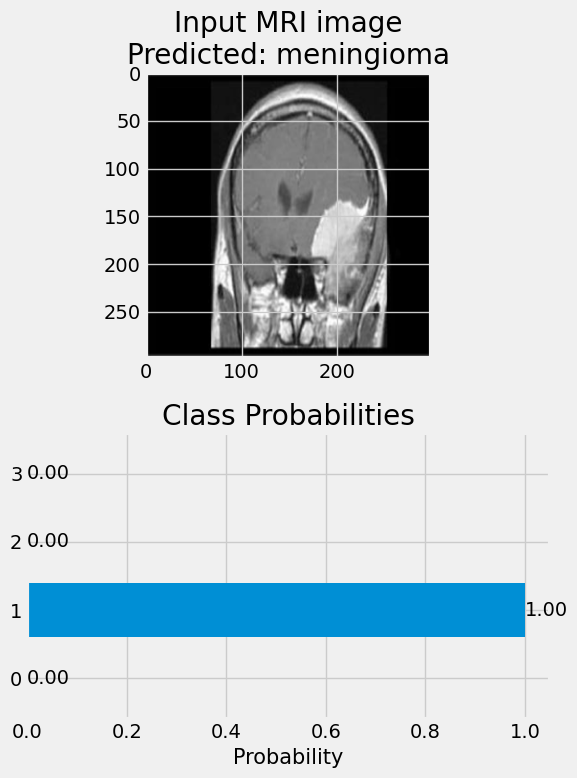


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


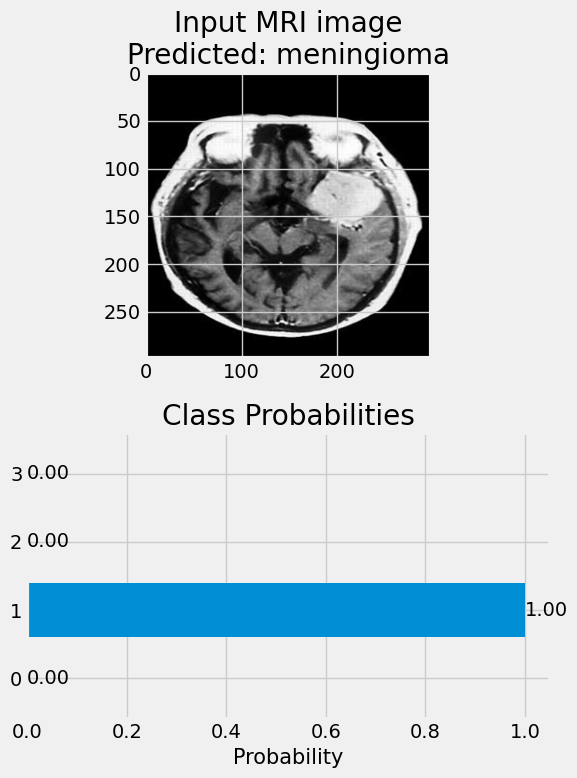


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


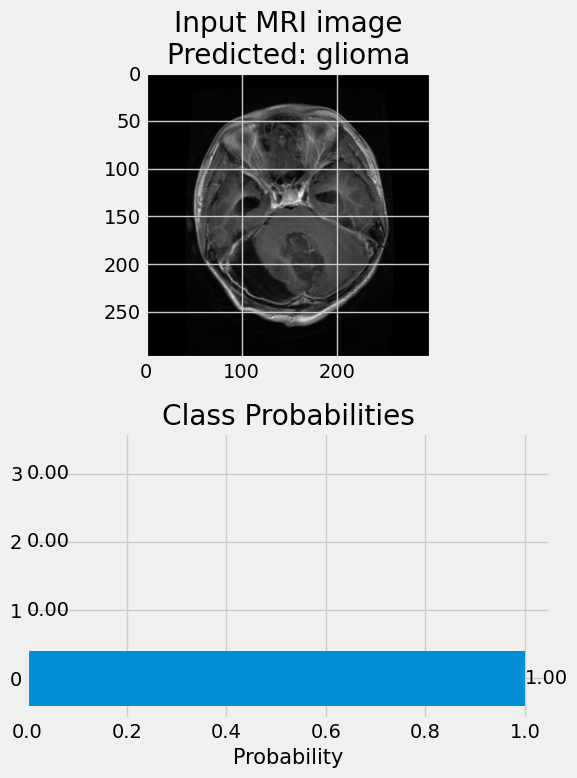


Predicted tumor type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
# Convolutional Neural Network - CNN

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [18]:
batch_size=16

img_size=(224,224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                                y_col='Class',
                                                batch_size=batch_size,
                                                target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size,
                                             shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [19]:
cnn_model = Sequential()

cnn_model.add(Conv2D(512, (3,3), padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))

cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs=7, validation_data=valid_gen)

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 160s 364ms/step - accuracy: 0.5937 - loss: 2.1259 - precision_1: 0.7221 - recall_1: 0.4206 - val_accuracy: 0.7282 - val_loss: 0.8815 - val_precision_1: 0.7694 - val_recall_1: 0.6366
Epoch 2/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 155s 310ms/step - accuracy: 0.8221 - loss: 0.6940 - precision_1: 0.8424 - recall_1: 0.7871 - val_accuracy: 0.8382 - val_loss: 0.6021 - val_precision_1: 0.8564 - val_recall_1: 0.8015
Epoch 3/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 143s 313ms/step - accuracy: 0.8715 - loss: 0.5047 - precision_1: 0.8837 - recall_1: 0.8617 - val_accuracy: 0.8733 - val_loss: 0.4553 - val_precision_1: 0.8814 - val_recall_1: 0.8626
Epoch 4/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 111s 311ms/step - accuracy: 0.9095 - loss: 0.3936 - precision_1: 0.9165 - recall_1: 0.9006 - val_accuracy: 0.9084 - val_loss: 0.3800 - val_precision_1: 0.9116 - val_recall_1: 0.8977
Epoch 5/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 112s 312ms/step - accuracy: 0.9204 - loss: 0.3430 - precision_1: 0.9248 - recall_1: 0.9

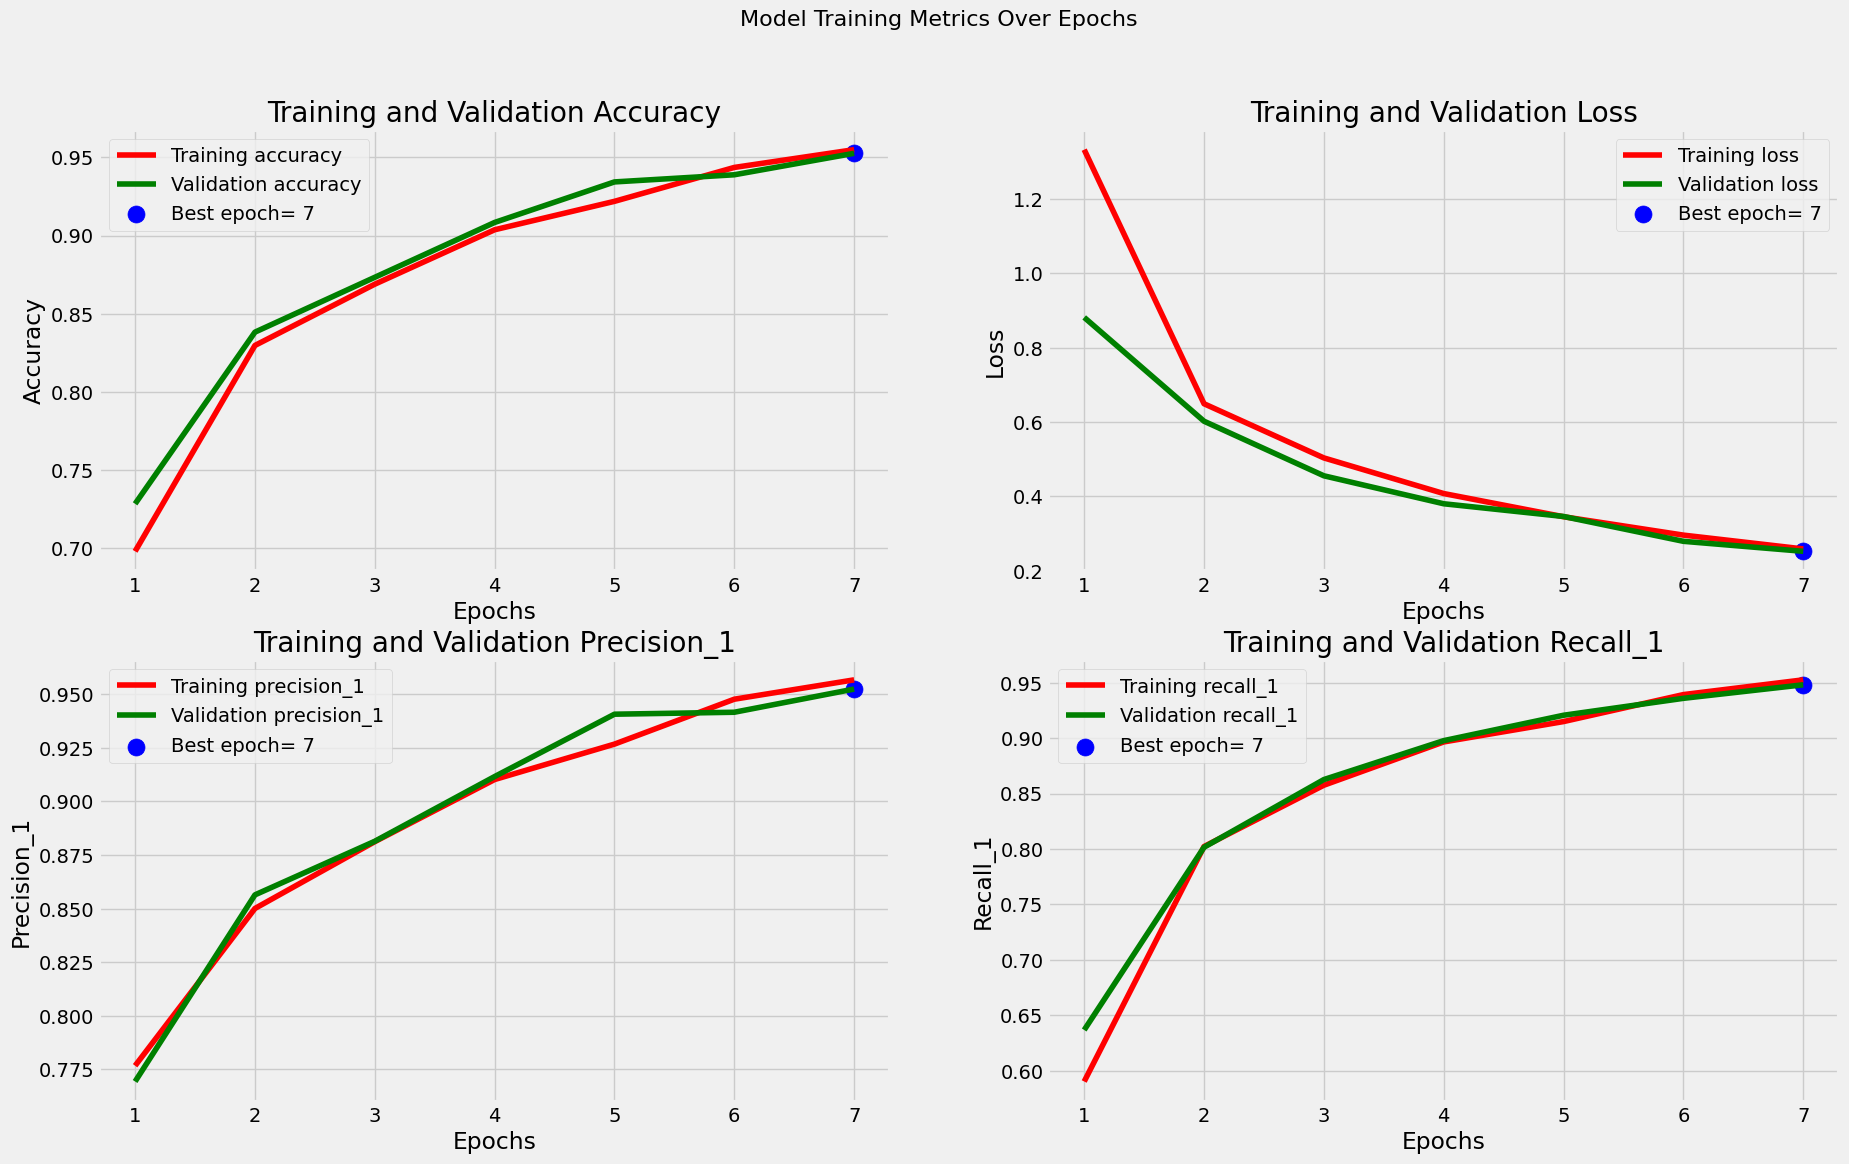

In [ ]:
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1,len(tr_metrics[metric])+1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch= {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Score: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f"Test Score: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.9824 - loss: 0.1939 - precision_1: 0.9827 - recall_1: 0.9813
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9462 - loss: 0.2424 - precision_1: 0.9478 - recall_1: 0.9434
 2/41 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9375 - loss: 0.2939 - precision_1: 0.9375 - recall_1: 0.9375 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9294 - loss: 0.3119 - precision_1: 0.9320 - recall_1: 0.9293
Train Score: 98.04%
Train Loss: 0.1952


Validation Accuracy: 95.11%
Validation Loss: 0.2505


Test Accuracy: 91.92%
Test Score: 0.3364


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step


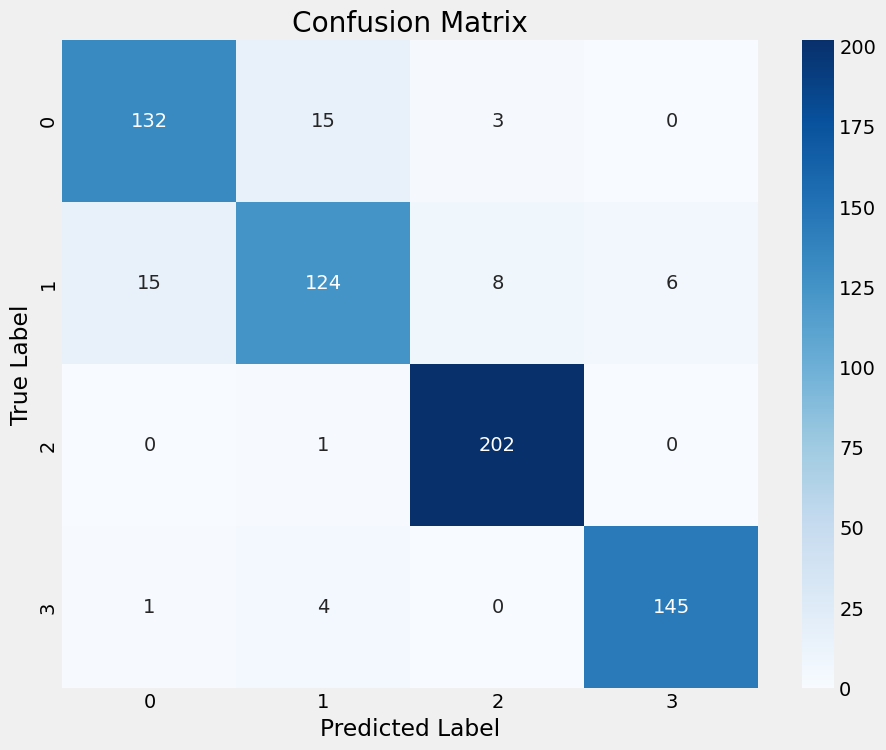

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       150
           1       0.86      0.81      0.84       153
           2       0.95      1.00      0.97       203
           3       0.96      0.97      0.96       150

    accuracy                           0.92       656
   macro avg       0.92      0.91      0.91       656
weighted avg       0.92      0.92      0.92       656



In [ ]:
cnn_model.save("cnn_model.h5")

In [20]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [21]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [23]:
ngrok_token = userdata.get('NGROQ_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [24]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [40]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
import pandas as pd

load_dotenv()



# Load environment variables
load_dotenv()

# Define labels for the classes
labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']


genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan. The saliency map was generated by a deep learning model that was trained to classify brain tumors as either glioma, meningioma, pituitary, or no tumor.

                The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

                The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

                In your response:
                - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
                - Explain possible reasons why the model made the prediction it did.
                - Don’t mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan' in your explanation.
                - Keep your explanation to 4 sentences max.

                Let's think step by step about this. Verify step by step.

                """


    img = PIL.Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, img])

    return response.text


def generate_saliency_map(model, img_array, class_index, img_size):


    with tf.GradientTape() as tape:
        # img_tensor = tf.convert_to_tensor(img_array)
        img_tensor = tf.expand_dims(tf.convert_to_tensor(img_array), axis=0)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # if gradients is None:
    #     raise ValueError("Gradients are None. Ensure the input tensor is properly tracked.")


    gradients = cv2.resize(gradients, img_size)

    center = (gradients.shape[0]//2,gradients.shape[1]//2)
    radius = min(center[0],center[1])-10
    y,x=np.ogrid[:gradients.shape[0],:gradients.shape[1]]
    mask = (x-center[0])**2 + (y-center[1])**2 <= radius**2

    gradients=gradients*mask

    brain_gradients = gradients[mask]

    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    threshold = np.percentile(gradients[mask],80)
    gradients[gradients < threshold] = 0

    gradients = cv2.GaussianBlur(gradients, (11,11), 0)

    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    heatmap = cv2.resize(heatmap, img_size)

    original_image = image.img_to_array(img)
    superimposed_img = heatmap*0.7+original_image*0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, "wb") as f:
      f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'

    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img


def load_xception_model(model_path):
    img_shape = (299, 299, 3)
    base_model = tf.keras.applications.Xception(
        include_top=False, weights="imagenet", input_shape=img_shape, pooling="max"
    )
    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation="relu"),
        Dropout(rate=0.25),
        Dense(4, activation="softmax"),
    ])
    model.build((None,) + img_shape)
    model.compile(
        optimizer=Adamax(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy", Precision(), Recall()],
    )
    model.load_weights(model_path)
    return model


st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    selected_model = st.radio("Select Model", ("Transfer Learning - Xception", "Custom CNN"))

    model = None
    img_size = None

    try:
        if selected_model == "Transfer Learning - Xception":
            model = load_xception_model('/content/xception_model.weights.h5')
            img_size = (299, 299)
        else:
            model = load_model('/content/cnn_model.h5')
            img_size = (224, 224)
    except Exception as e:
        st.error(f"Error loading the model: {str(e)}")

    if model is not None:
        try:
            img = image.load_img(uploaded_file, target_size=img_size)
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            prediction = model.predict(img_array)
            class_index = np.argmax(prediction[0])
            result = labels[class_index]

            # st.write(f"**Predicted Class:** {result}")
            # st.write("**Predictions:**")
            # for label, prob in zip(labels, prediction[0]):
            #     st.write(f"{label}: {prob:.4f}")
            st.markdown("## **Predicted Class**")
            st.write(f"### {result}")

            st.markdown("## **Predictions**")

            # Create a DataFrame for visualization
            predictions_df = pd.DataFrame({
                "Labels": labels,
                "Probability": prediction[0]
            })

            # Display bar chart
            st.bar_chart(predictions_df.set_index("Labels"))

            # Optional: Add a table for textual representation
            st.table(predictions_df)

            saliency_map = None
            try:
                with tf.device('/CPU:0'):
                    saliency_map = generate_saliency_map(model, img_array[0], class_index, img_size)
            except Exception as e:
                st.error(f"Error generating saliency map: {str(e)}")

            col1, col2 = st.columns(2)
            with col1:
                st.image(uploaded_file, caption='Uploaded Image', use_container_width=True)
            with col2:
                if saliency_map is not None:
                    st.image(saliency_map, caption='Saliency Map', use_container_width=True)
                else:
                    st.warning("Saliency map could not be generated.")
        except Exception as e:
            st.error(f"Error processing the image: {str(e)}")
        if saliency_map is not None:
          saliency_map_path = f'saliency_maps/{uploaded_file.name}'
          explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])
          st.write("**Explanation:**")
          st.write(explanation)
    else:
        st.warning("Model could not be loaded. Please check the file paths or model configurations.")

Overwriting app.py


In [41]:
thread = Thread(target=run_streamlit)
thread.start()

In [42]:
public_url = ngrok.connect(8501, proto='http', bind_tls=True)

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://15ca-34-69-17-132.ngrok-free.app" -> "http://localhost:8501"


In [38]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://166b-34-69-17-132.ngrok-free.app -> http://localhost:8501
Closing tunnel: https://0ff3-34-69-17-132.ngrok-free.app -> http://localhost:8501
Closing tunnel: https://aaed-34-69-17-132.ngrok-free.app -> http://localhost:8501


Writing .env
